## Libraries and Model Characterstics

In [1]:
from pulp import *
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
number_of_manufacturing_center = 1
number_of_distribution_center = 4
number_of_swapping_station = 10

## Variables and data

In [3]:
for i in range(number_of_distribution_center):
    if i ==0:
        Xb0_c = LpVariable.dicts("Xb0_c",range(number_of_swapping_station),lowBound=0,cat='Integer')
    if i==1:
        Xb1_c = LpVariable.dicts('Xb1_c',range(number_of_swapping_station),lowBound=0,cat='Integer')
    if i==2:
        Xb2_c = LpVariable.dicts('Xb2_c',range(number_of_swapping_station),lowBound=0,cat='Integer')
    if i==3:
        Xb3_c = LpVariable.dicts('Xb3_c',range(number_of_swapping_station),lowBound=0,cat='Integer')

In [4]:
for i in range(number_of_distribution_center):
    if i ==0:
        Xcb0 = LpVariable.dicts("Xb0_rev_c",range(number_of_swapping_station),lowBound=0,cat='Integer')
    if i==1:
        Xcb1 = LpVariable.dicts('Xb1_rev_c',range(number_of_swapping_station),lowBound=0,cat='Integer')
    if i==2:
        Xcb2 = LpVariable.dicts('Xb2_rev_c',range(number_of_swapping_station),lowBound=0,cat='Integer')
    if i==3:
        Xcb3 = LpVariable.dicts('Xb3_rev_c',range(number_of_swapping_station),lowBound=0,cat='Integer')

In [5]:
Yb = LpVariable.dicts("Yb",range(number_of_distribution_center),lowBound=0,upBound=1,cat='Integer')
Yb

{0: Yb_0, 1: Yb_1, 2: Yb_2, 3: Yb_3}

In [6]:
Yc = LpVariable.dicts('Yc',range(number_of_swapping_station),lowBound=0,upBound=1,cat='Integer')
Yc

{0: Yc_0,
 1: Yc_1,
 2: Yc_2,
 3: Yc_3,
 4: Yc_4,
 5: Yc_5,
 6: Yc_6,
 7: Yc_7,
 8: Yc_8,
 9: Yc_9}

In [7]:
distance_BC = pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='dist_B_to_C')
distance_BC

,flow,dist
0,Xb1c1,44
1,Xb1c2,58
2,Xb1c3,35
3,Xb1c4,55
4,Xb1c5,23
5,Xb1c6,38
6,Xb1c7,32
7,Xb1c8,11
8,Xb1c9,5
9,Xb1c10,60


In [8]:
constants = pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Constants')
constants

,const,value
0,Cab,30.0
1,Vab,50.0
2,Cbc,50.0
3,Vbc,20.0
4,alpha,0.2
5,Charging Cost,15.0


In [9]:
coef_for_B = pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Coef for B')
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour,Capacity
0,Yb1,250000,5,18000,18000
1,Yb2,300000,8,36000,22000
2,Yb3,275000,10,24000,20000
3,Yb4,350000,7,30000,25000


In [10]:
coef_for_C= pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Coef for C')
coef_for_C

,Swapping station,Acquition cost,Demand,Capacity,rent_labour
0,Yc1,65000,9300,10100,24000
1,Yc2,80000,11300,9400,9600
2,Yc3,95000,10100,12100,32400
3,Yc4,60000,10600,9400,14400
4,Yc5,75000,10000,9600,9600
5,Yc6,65000,11300,11200,28800
6,Yc7,70000,9700,10500,38400
7,Yc8,85000,12000,11900,18000
8,Yc9,78000,11600,10000,26400
9,Yc10,90000,9000,12500,32400


## objective 1: cost

### Transportation cost straight flow

In [11]:
Xbc = {0:Xb0_c,
      1:Xb1_c,
      2:Xb2_c,
      3:Xb3_c}

In [12]:
k = constants.iloc[2,1]/constants.iloc[3,1]
list_of_transportation_cost_st=[]
j=0
for m in range(number_of_distribution_center):
    list_of_transportation_cost_st.append([distance_BC.iloc[i+j,1]*Xbc[m][i]*k for i in range(number_of_swapping_station)])
    j=j+10

In [13]:
print(list_of_transportation_cost_st)

[[110.0*Xb0_c_0 + 0.0, 145.0*Xb0_c_1 + 0.0, 87.5*Xb0_c_2 + 0.0, 137.5*Xb0_c_3 + 0.0, 57.5*Xb0_c_4 + 0.0, 95.0*Xb0_c_5 + 0.0, 80.0*Xb0_c_6 + 0.0, 27.5*Xb0_c_7 + 0.0, 12.5*Xb0_c_8 + 0.0, 150.0*Xb0_c_9 + 0.0], [80.0*Xb1_c_0 + 0.0, 152.5*Xb1_c_1 + 0.0, 37.5*Xb1_c_2 + 0.0, 105.0*Xb1_c_3 + 0.0, 187.5*Xb1_c_4 + 0.0, 25.0*Xb1_c_5 + 0.0, 190.0*Xb1_c_6 + 0.0, 127.5*Xb1_c_7 + 0.0, 12.5*Xb1_c_8 + 0.0, 162.5*Xb1_c_9 + 0.0], [115.0*Xb2_c_0 + 0.0, 155.0*Xb2_c_1 + 0.0, 82.5*Xb2_c_2 + 0.0, 27.5*Xb2_c_3 + 0.0, 185.0*Xb2_c_4 + 0.0, 175.0*Xb2_c_5 + 0.0, 32.5*Xb2_c_6 + 0.0, 17.5*Xb2_c_7 + 0.0, 77.5*Xb2_c_8 + 0.0, 182.5*Xb2_c_9 + 0.0], [30.0*Xb3_c_0 + 0.0, 137.5*Xb3_c_1 + 0.0, 92.5*Xb3_c_2 + 0.0, 190.0*Xb3_c_3 + 0.0, 60.0*Xb3_c_4 + 0.0, 90.0*Xb3_c_5 + 0.0, 127.5*Xb3_c_6 + 0.0, 117.5*Xb3_c_7 + 0.0, 50.0*Xb3_c_8 + 0.0, 27.5*Xb3_c_9 + 0.0]]


### Transportation cost reverse flow

In [14]:
Xcb = {0:Xcb0,
      1:Xcb1,
      2:Xcb2,
      3:Xcb3}

In [15]:
constants

,const,value
0,Cab,30.0
1,Vab,50.0
2,Cbc,50.0
3,Vbc,20.0
4,alpha,0.2
5,Charging Cost,15.0


In [16]:
k = constants.iloc[2,1]/constants.iloc[3,1]
list_of_transportation_cost_rev=[]
j=0
for m in range(number_of_distribution_center):
    list_of_transportation_cost_rev.append([distance_BC.iloc[i+j,1]*Xcb[m][i]*k for i in range(number_of_swapping_station)])
    j=j+10

In [17]:
print(list_of_transportation_cost_rev)

[[110.0*Xb0_rev_c_0 + 0.0, 145.0*Xb0_rev_c_1 + 0.0, 87.5*Xb0_rev_c_2 + 0.0, 137.5*Xb0_rev_c_3 + 0.0, 57.5*Xb0_rev_c_4 + 0.0, 95.0*Xb0_rev_c_5 + 0.0, 80.0*Xb0_rev_c_6 + 0.0, 27.5*Xb0_rev_c_7 + 0.0, 12.5*Xb0_rev_c_8 + 0.0, 150.0*Xb0_rev_c_9 + 0.0], [80.0*Xb1_rev_c_0 + 0.0, 152.5*Xb1_rev_c_1 + 0.0, 37.5*Xb1_rev_c_2 + 0.0, 105.0*Xb1_rev_c_3 + 0.0, 187.5*Xb1_rev_c_4 + 0.0, 25.0*Xb1_rev_c_5 + 0.0, 190.0*Xb1_rev_c_6 + 0.0, 127.5*Xb1_rev_c_7 + 0.0, 12.5*Xb1_rev_c_8 + 0.0, 162.5*Xb1_rev_c_9 + 0.0], [115.0*Xb2_rev_c_0 + 0.0, 155.0*Xb2_rev_c_1 + 0.0, 82.5*Xb2_rev_c_2 + 0.0, 27.5*Xb2_rev_c_3 + 0.0, 185.0*Xb2_rev_c_4 + 0.0, 175.0*Xb2_rev_c_5 + 0.0, 32.5*Xb2_rev_c_6 + 0.0, 17.5*Xb2_rev_c_7 + 0.0, 77.5*Xb2_rev_c_8 + 0.0, 182.5*Xb2_rev_c_9 + 0.0], [30.0*Xb3_rev_c_0 + 0.0, 137.5*Xb3_rev_c_1 + 0.0, 92.5*Xb3_rev_c_2 + 0.0, 190.0*Xb3_rev_c_3 + 0.0, 60.0*Xb3_rev_c_4 + 0.0, 90.0*Xb3_rev_c_5 + 0.0, 127.5*Xb3_rev_c_6 + 0.0, 117.5*Xb3_rev_c_7 + 0.0, 50.0*Xb3_rev_c_8 + 0.0, 27.5*Xb3_rev_c_9 + 0.0]]


### Disposal cost

In [18]:
Xbd = LpVariable.dicts('Xdb',range(number_of_distribution_center),lowBound=0,cat='Integer')
Xbd

{0: Xdb_0, 1: Xdb_1, 2: Xdb_2, 3: Xdb_3}

In [19]:
#coef_for_B = pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Coef for B')
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour,Capacity
0,Yb1,250000,5,18000,18000
1,Yb2,300000,8,36000,22000
2,Yb3,275000,10,24000,20000
3,Yb4,350000,7,30000,25000


In [20]:
list_of_disposal_cost = [coef_for_B.iloc[i,2]*Xbd[i] for i in range(number_of_distribution_center)]
list_of_disposal_cost

[5*Xdb_0 + 0, 8*Xdb_1 + 0, 10*Xdb_2 + 0, 7*Xdb_3 + 0]

### Rent + labour 

In [21]:
rent_labour_of_distribution_center = [coef_for_B.iloc[i,3]*Yb[i] for i in range(number_of_distribution_center)]
rent_labour_of_distribution_center

[18000*Yb_0 + 0, 36000*Yb_1 + 0, 24000*Yb_2 + 0, 30000*Yb_3 + 0]

In [22]:
rent_labour_of_swapping_station = [coef_for_C.iloc[i,4]*Yc[i] for i in range(number_of_swapping_station)]
rent_labour_of_swapping_station

[24000*Yc_0 + 0,
 9600*Yc_1 + 0,
 32400*Yc_2 + 0,
 14400*Yc_3 + 0,
 9600*Yc_4 + 0,
 28800*Yc_5 + 0,
 38400*Yc_6 + 0,
 18000*Yc_7 + 0,
 26400*Yc_8 + 0,
 32400*Yc_9 + 0]

### charging cost

In [23]:
list_of_charging_cost = [constants.iloc[5,1]*Xcb[i][j] for i in range(number_of_distribution_center) for j in range(number_of_swapping_station)]
print(list_of_charging_cost)

[15.0*Xb0_rev_c_0 + 0.0, 15.0*Xb0_rev_c_1 + 0.0, 15.0*Xb0_rev_c_2 + 0.0, 15.0*Xb0_rev_c_3 + 0.0, 15.0*Xb0_rev_c_4 + 0.0, 15.0*Xb0_rev_c_5 + 0.0, 15.0*Xb0_rev_c_6 + 0.0, 15.0*Xb0_rev_c_7 + 0.0, 15.0*Xb0_rev_c_8 + 0.0, 15.0*Xb0_rev_c_9 + 0.0, 15.0*Xb1_rev_c_0 + 0.0, 15.0*Xb1_rev_c_1 + 0.0, 15.0*Xb1_rev_c_2 + 0.0, 15.0*Xb1_rev_c_3 + 0.0, 15.0*Xb1_rev_c_4 + 0.0, 15.0*Xb1_rev_c_5 + 0.0, 15.0*Xb1_rev_c_6 + 0.0, 15.0*Xb1_rev_c_7 + 0.0, 15.0*Xb1_rev_c_8 + 0.0, 15.0*Xb1_rev_c_9 + 0.0, 15.0*Xb2_rev_c_0 + 0.0, 15.0*Xb2_rev_c_1 + 0.0, 15.0*Xb2_rev_c_2 + 0.0, 15.0*Xb2_rev_c_3 + 0.0, 15.0*Xb2_rev_c_4 + 0.0, 15.0*Xb2_rev_c_5 + 0.0, 15.0*Xb2_rev_c_6 + 0.0, 15.0*Xb2_rev_c_7 + 0.0, 15.0*Xb2_rev_c_8 + 0.0, 15.0*Xb2_rev_c_9 + 0.0, 15.0*Xb3_rev_c_0 + 0.0, 15.0*Xb3_rev_c_1 + 0.0, 15.0*Xb3_rev_c_2 + 0.0, 15.0*Xb3_rev_c_3 + 0.0, 15.0*Xb3_rev_c_4 + 0.0, 15.0*Xb3_rev_c_5 + 0.0, 15.0*Xb3_rev_c_6 + 0.0, 15.0*Xb3_rev_c_7 + 0.0, 15.0*Xb3_rev_c_8 + 0.0, 15.0*Xb3_rev_c_9 + 0.0]


### Transportation cost A to B

In [24]:
num_of_Xab = number_of_manufacturing_center*number_of_distribution_center
Xab = LpVariable.dicts('Xab',range(num_of_Xab),lowBound=0,cat='Integer')
Xab

{0: Xab_0, 1: Xab_1, 2: Xab_2, 3: Xab_3}

In [25]:
dist_A_to_B = pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='dist_A_to_B')
dist_A_to_B

,flow,dist
0,Xa1b1,260
1,Xa1b2,330
2,Xa1b3,225
3,Xa1b4,295


In [26]:
m = constants.iloc[0,1]/constants.iloc[1,1]
list_of_transportation_A_to_B = [dist_A_to_B.iloc[i,1]*Xab[i]*m for i in range(num_of_Xab)]
list_of_transportation_A_to_B

[156.0*Xab_0 + 0.0, 198.0*Xab_1 + 0.0, 135.0*Xab_2 + 0.0, 177.0*Xab_3 + 0.0]

### Acquisition Cost of distribution center

In [27]:
#Yb = LpVariable.dicts("Yb",range(number_of_distribution_center),lowBound=0,upBound=1,cat='Integer')
Yb

{0: Yb_0, 1: Yb_1, 2: Yb_2, 3: Yb_3}

In [28]:
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour,Capacity
0,Yb1,250000,5,18000,18000
1,Yb2,300000,8,36000,22000
2,Yb3,275000,10,24000,20000
3,Yb4,350000,7,30000,25000


In [29]:
list_of_acq_cost_distribution = [coef_for_B.iloc[i,1]*Yb[i] for i in range(number_of_distribution_center)]
list_of_acq_cost_distribution

[250000*Yb_0 + 0, 300000*Yb_1 + 0, 275000*Yb_2 + 0, 350000*Yb_3 + 0]

### Acquisition cost of swapping center

In [30]:
#Yc = LpVariable.dicts('Yc',range(number_of_swapping_station),lowBound=0,upBound=1,cat='Integer')
#coef_for_C= pd.read_excel(r'D:\Project\values for 10.xlsx',sheet_name='Coef for C')
coef_for_C

,Swapping station,Acquition cost,Demand,Capacity,rent_labour
0,Yc1,65000,9300,10100,24000
1,Yc2,80000,11300,9400,9600
2,Yc3,95000,10100,12100,32400
3,Yc4,60000,10600,9400,14400
4,Yc5,75000,10000,9600,9600
5,Yc6,65000,11300,11200,28800
6,Yc7,70000,9700,10500,38400
7,Yc8,85000,12000,11900,18000
8,Yc9,78000,11600,10000,26400
9,Yc10,90000,9000,12500,32400


In [31]:
list_of_acq_swap = [coef_for_C.iloc[i,1]*Yc[i] for i in range(number_of_swapping_station)]
list_of_acq_swap

[65000*Yc_0 + 0,
 80000*Yc_1 + 0,
 95000*Yc_2 + 0,
 60000*Yc_3 + 0,
 75000*Yc_4 + 0,
 65000*Yc_5 + 0,
 70000*Yc_6 + 0,
 85000*Yc_7 + 0,
 78000*Yc_8 + 0,
 90000*Yc_9 + 0]

### objective function

In [32]:
prob = LpProblem('Cost',LpMinimize)
prob +=lpSum(list_of_transportation_cost_rev+list_of_transportation_cost_st+list_of_acq_cost_distribution+list_of_acq_swap+list_of_disposal_cost+list_of_transportation_A_to_B+list_of_charging_cost+rent_labour_of_swapping_station+rent_labour_of_distribution_center)

In [33]:
prob

Cost:
MINIMIZE
156.0*Xab_0 + 198.0*Xab_1 + 135.0*Xab_2 + 177.0*Xab_3 + 110.0*Xb0_c_0 + 145.0*Xb0_c_1 + 87.5*Xb0_c_2 + 137.5*Xb0_c_3 + 57.5*Xb0_c_4 + 95.0*Xb0_c_5 + 80.0*Xb0_c_6 + 27.5*Xb0_c_7 + 12.5*Xb0_c_8 + 150.0*Xb0_c_9 + 125.0*Xb0_rev_c_0 + 160.0*Xb0_rev_c_1 + 102.5*Xb0_rev_c_2 + 152.5*Xb0_rev_c_3 + 72.5*Xb0_rev_c_4 + 110.0*Xb0_rev_c_5 + 95.0*Xb0_rev_c_6 + 42.5*Xb0_rev_c_7 + 27.5*Xb0_rev_c_8 + 165.0*Xb0_rev_c_9 + 80.0*Xb1_c_0 + 152.5*Xb1_c_1 + 37.5*Xb1_c_2 + 105.0*Xb1_c_3 + 187.5*Xb1_c_4 + 25.0*Xb1_c_5 + 190.0*Xb1_c_6 + 127.5*Xb1_c_7 + 12.5*Xb1_c_8 + 162.5*Xb1_c_9 + 95.0*Xb1_rev_c_0 + 167.5*Xb1_rev_c_1 + 52.5*Xb1_rev_c_2 + 120.0*Xb1_rev_c_3 + 202.5*Xb1_rev_c_4 + 40.0*Xb1_rev_c_5 + 205.0*Xb1_rev_c_6 + 142.5*Xb1_rev_c_7 + 27.5*Xb1_rev_c_8 + 177.5*Xb1_rev_c_9 + 115.0*Xb2_c_0 + 155.0*Xb2_c_1 + 82.5*Xb2_c_2 + 27.5*Xb2_c_3 + 185.0*Xb2_c_4 + 175.0*Xb2_c_5 + 32.5*Xb2_c_6 + 17.5*Xb2_c_7 + 77.5*Xb2_c_8 + 182.5*Xb2_c_9 + 130.0*Xb2_rev_c_0 + 170.0*Xb2_rev_c_1 + 97.5*Xb2_rev_c_2 + 42.5*Xb2_rev_

## Constraints

### Demand constraint at swapping station

In [34]:
coef_for_C

,Swapping station,Acquition cost,Demand,Capacity,rent_labour
0,Yc1,65000,9300,10100,24000
1,Yc2,80000,11300,9400,9600
2,Yc3,95000,10100,12100,32400
3,Yc4,60000,10600,9400,14400
4,Yc5,75000,10000,9600,9600
5,Yc6,65000,11300,11200,28800
6,Yc7,70000,9700,10500,38400
7,Yc8,85000,12000,11900,18000
8,Yc9,78000,11600,10000,26400
9,Yc10,90000,9000,12500,32400


In [35]:
for i in range(number_of_swapping_station):
    prob += lpSum(Xcb[j][i] for j in range(number_of_distribution_center))==coef_for_C.iloc[i,2]*Yc[i]

### Binary constraint

In [36]:
for i in range(number_of_distribution_center):
    for j in range(number_of_swapping_station):
        prob += Yb[i]>=Xbc[i][j]*0.00002
        prob += Yb[i]>=Xcb[i][j]*0.00002

### Disposal constraint

In [37]:
constants

,const,value
0,Cab,30.0
1,Vab,50.0
2,Cbc,50.0
3,Vbc,20.0
4,alpha,0.2
5,Charging Cost,15.0


In [38]:
for i in range(number_of_distribution_center):
    prob += Xbd[i]== constants.iloc[4,1]*lpSum(Xcb[i][j] for j in range(number_of_swapping_station))

### Flow at swapping station

In [39]:
coef_for_C

,Swapping station,Acquition cost,Demand,Capacity,rent_labour
0,Yc1,65000,9300,10100,24000
1,Yc2,80000,11300,9400,9600
2,Yc3,95000,10100,12100,32400
3,Yc4,60000,10600,9400,14400
4,Yc5,75000,10000,9600,9600
5,Yc6,65000,11300,11200,28800
6,Yc7,70000,9700,10500,38400
7,Yc8,85000,12000,11900,18000
8,Yc9,78000,11600,10000,26400
9,Yc10,90000,9000,12500,32400


In [40]:
for i in range(number_of_swapping_station):
    prob += lpSum(Xbc[j][i] for j in range(number_of_distribution_center))-lpSum(Xcb[j][i] for j in range(number_of_distribution_center))<= coef_for_C.iloc[i,3]*Yc[i]
    prob += lpSum(Xbc[j][i] for j in range(number_of_distribution_center))-lpSum(Xcb[j][i] for j in range(number_of_distribution_center))>=0

### Capacity constraint at distribution center

In [41]:
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour,Capacity
0,Yb1,250000,5,18000,18000
1,Yb2,300000,8,36000,22000
2,Yb3,275000,10,24000,20000
3,Yb4,350000,7,30000,25000


In [42]:
for i in range(number_of_distribution_center):
    prob += Xab[i]-Xbd[i]+ lpSum(Xcb[i][j] for j in range(number_of_distribution_center))-lpSum(Xbc[i][j] for j in range(number_of_distribution_center))<=coef_for_B.iloc[i,4]*Yb[i]
    prob +=  Xab[i]-Xbd[i]+ lpSum(Xcb[i][j] for j in range(number_of_distribution_center))-lpSum(Xbc[i][j] for j in range(number_of_distribution_center))>=0

### Demand constraint

In [43]:
coef_for_C

,Swapping station,Acquition cost,Demand,Capacity,rent_labour
0,Yc1,65000,9300,10100,24000
1,Yc2,80000,11300,9400,9600
2,Yc3,95000,10100,12100,32400
3,Yc4,60000,10600,9400,14400
4,Yc5,75000,10000,9600,9600
5,Yc6,65000,11300,11200,28800
6,Yc7,70000,9700,10500,38400
7,Yc8,85000,12000,11900,18000
8,Yc9,78000,11600,10000,26400
9,Yc10,90000,9000,12500,32400


In [44]:
prob += lpSum(Yc[i]*coef_for_C.iloc[i,2] for i in range(number_of_swapping_station))>=40000

### Yb and Yc constraint

In [45]:
prob += lpSum(Yb[i] for i in range(number_of_distribution_center))>=2
prob += lpSum(Yc[i] for i in range(number_of_swapping_station))>=5

## Final Problem

In [46]:
prob

Cost:
MINIMIZE
156.0*Xab_0 + 198.0*Xab_1 + 135.0*Xab_2 + 177.0*Xab_3 + 110.0*Xb0_c_0 + 145.0*Xb0_c_1 + 87.5*Xb0_c_2 + 137.5*Xb0_c_3 + 57.5*Xb0_c_4 + 95.0*Xb0_c_5 + 80.0*Xb0_c_6 + 27.5*Xb0_c_7 + 12.5*Xb0_c_8 + 150.0*Xb0_c_9 + 125.0*Xb0_rev_c_0 + 160.0*Xb0_rev_c_1 + 102.5*Xb0_rev_c_2 + 152.5*Xb0_rev_c_3 + 72.5*Xb0_rev_c_4 + 110.0*Xb0_rev_c_5 + 95.0*Xb0_rev_c_6 + 42.5*Xb0_rev_c_7 + 27.5*Xb0_rev_c_8 + 165.0*Xb0_rev_c_9 + 80.0*Xb1_c_0 + 152.5*Xb1_c_1 + 37.5*Xb1_c_2 + 105.0*Xb1_c_3 + 187.5*Xb1_c_4 + 25.0*Xb1_c_5 + 190.0*Xb1_c_6 + 127.5*Xb1_c_7 + 12.5*Xb1_c_8 + 162.5*Xb1_c_9 + 95.0*Xb1_rev_c_0 + 167.5*Xb1_rev_c_1 + 52.5*Xb1_rev_c_2 + 120.0*Xb1_rev_c_3 + 202.5*Xb1_rev_c_4 + 40.0*Xb1_rev_c_5 + 205.0*Xb1_rev_c_6 + 142.5*Xb1_rev_c_7 + 27.5*Xb1_rev_c_8 + 177.5*Xb1_rev_c_9 + 115.0*Xb2_c_0 + 155.0*Xb2_c_1 + 82.5*Xb2_c_2 + 27.5*Xb2_c_3 + 185.0*Xb2_c_4 + 175.0*Xb2_c_5 + 32.5*Xb2_c_6 + 17.5*Xb2_c_7 + 77.5*Xb2_c_8 + 182.5*Xb2_c_9 + 130.0*Xb2_rev_c_0 + 170.0*Xb2_rev_c_1 + 97.5*Xb2_rev_c_2 + 42.5*Xb2_rev_

In [47]:
prob.solve()

1

In [48]:
LpStatus[prob.solve()]

'Optimal'

In [49]:
for variables in prob.variables():
    print( variables.name+'   '+ str(variables.value()))

Xab_0   0.0
Xab_1   0.0
Xab_2   6460.0
Xab_3   3660.0
Xb0_c_0   0.0
Xb0_c_1   0.0
Xb0_c_2   0.0
Xb0_c_3   0.0
Xb0_c_4   0.0
Xb0_c_5   0.0
Xb0_c_6   0.0
Xb0_c_7   0.0
Xb0_c_8   0.0
Xb0_c_9   0.0
Xb0_rev_c_0   0.0
Xb0_rev_c_1   0.0
Xb0_rev_c_2   0.0
Xb0_rev_c_3   0.0
Xb0_rev_c_4   0.0
Xb0_rev_c_5   0.0
Xb0_rev_c_6   0.0
Xb0_rev_c_7   0.0
Xb0_rev_c_8   0.0
Xb0_rev_c_9   0.0
Xb1_c_0   0.0
Xb1_c_1   0.0
Xb1_c_2   0.0
Xb1_c_3   0.0
Xb1_c_4   0.0
Xb1_c_5   0.0
Xb1_c_6   0.0
Xb1_c_7   0.0
Xb1_c_8   0.0
Xb1_c_9   0.0
Xb1_rev_c_0   0.0
Xb1_rev_c_1   0.0
Xb1_rev_c_2   0.0
Xb1_rev_c_3   0.0
Xb1_rev_c_4   0.0
Xb1_rev_c_5   0.0
Xb1_rev_c_6   0.0
Xb1_rev_c_7   0.0
Xb1_rev_c_8   0.0
Xb1_rev_c_9   0.0
Xb2_c_0   0.0
Xb2_c_1   0.0
Xb2_c_2   0.0
Xb2_c_3   10600.0
Xb2_c_4   0.0
Xb2_c_5   0.0
Xb2_c_6   9700.0
Xb2_c_7   12000.0
Xb2_c_8   0.0
Xb2_c_9   0.0
Xb2_rev_c_0   0.0
Xb2_rev_c_1   0.0
Xb2_rev_c_2   0.0
Xb2_rev_c_3   10600.0
Xb2_rev_c_4   0.0
Xb2_rev_c_5   0.0
Xb2_rev_c_6   9700.0
Xb2_rev_c_7   12000.0


In [50]:
print(prob.objective.value())

6231840.0


## II objective

### DATA

In [51]:
coef_for_B

,Unnamed: 0,Acq,Disposal Cost,Rent + Labour,Capacity
0,Yb1,250000,5,18000,18000
1,Yb2,300000,8,36000,22000
2,Yb3,275000,10,24000,20000
3,Yb4,350000,7,30000,25000


In [52]:
coef_for_C

,Swapping station,Acquition cost,Demand,Capacity,rent_labour
0,Yc1,65000,9300,10100,24000
1,Yc2,80000,11300,9400,9600
2,Yc3,95000,10100,12100,32400
3,Yc4,60000,10600,9400,14400
4,Yc5,75000,10000,9600,9600
5,Yc6,65000,11300,11200,28800
6,Yc7,70000,9700,10500,38400
7,Yc8,85000,12000,11900,18000
8,Yc9,78000,11600,10000,26400
9,Yc10,90000,9000,12500,32400


In [53]:
#distance_BC

### emission between A and B

In [54]:
dist_A_to_B

,flow,dist
0,Xa1b1,260
1,Xa1b2,330
2,Xa1b3,225
3,Xa1b4,295


In [55]:
constants

,const,value
0,Cab,30.0
1,Vab,50.0
2,Cbc,50.0
3,Vbc,20.0
4,alpha,0.2
5,Charging Cost,15.0


In [56]:
emission_AB = lpSum(220*Xab[i]*dist_A_to_B.iloc[i,1]*(1/50) for i in range(number_of_distribution_center))
emission_AB

1144.0*Xab_0 + 1452.0*Xab_1 + 990.0*Xab_2 + 1298.0*Xab_3 + 0.0

### emission between B and C

In [57]:
distance_BC

,flow,dist
0,Xb1c1,44
1,Xb1c2,58
2,Xb1c3,35
3,Xb1c4,55
4,Xb1c5,23
5,Xb1c6,38
6,Xb1c7,32
7,Xb1c8,11
8,Xb1c9,5
9,Xb1c10,60


In [58]:
k = 1/constants.iloc[3,1]
list_of_emission_bc = []
j=0
for m in range(number_of_distribution_center):
    list_of_emission_bc.append([120*distance_BC.iloc[i+j,1]*Xbc[m][i]*k for i in range(number_of_swapping_station)])
    j=j+10

In [59]:
print(list_of_emission_bc)

[[264.0*Xb0_c_0 + 0.0, 348.0*Xb0_c_1 + 0.0, 210.0*Xb0_c_2 + 0.0, 330.0*Xb0_c_3 + 0.0, 138.0*Xb0_c_4 + 0.0, 228.0*Xb0_c_5 + 0.0, 192.0*Xb0_c_6 + 0.0, 66.0*Xb0_c_7 + 0.0, 30.0*Xb0_c_8 + 0.0, 360.0*Xb0_c_9 + 0.0], [192.0*Xb1_c_0 + 0.0, 366.0*Xb1_c_1 + 0.0, 90.0*Xb1_c_2 + 0.0, 252.0*Xb1_c_3 + 0.0, 450.0*Xb1_c_4 + 0.0, 60.0*Xb1_c_5 + 0.0, 456.0*Xb1_c_6 + 0.0, 306.0*Xb1_c_7 + 0.0, 30.0*Xb1_c_8 + 0.0, 390.0*Xb1_c_9 + 0.0], [276.0*Xb2_c_0 + 0.0, 372.0*Xb2_c_1 + 0.0, 198.0*Xb2_c_2 + 0.0, 66.0*Xb2_c_3 + 0.0, 444.0*Xb2_c_4 + 0.0, 420.0*Xb2_c_5 + 0.0, 78.0*Xb2_c_6 + 0.0, 42.0*Xb2_c_7 + 0.0, 186.0*Xb2_c_8 + 0.0, 438.0*Xb2_c_9 + 0.0], [72.0*Xb3_c_0 + 0.0, 330.0*Xb3_c_1 + 0.0, 222.0*Xb3_c_2 + 0.0, 456.0*Xb3_c_3 + 0.0, 144.0*Xb3_c_4 + 0.0, 216.0*Xb3_c_5 + 0.0, 306.0*Xb3_c_6 + 0.0, 282.0*Xb3_c_7 + 0.0, 120.0*Xb3_c_8 + 0.0, 66.0*Xb3_c_9 + 0.0]]


### Emission between C and B

In [60]:
k = 1/constants.iloc[3,1]
list_of_emission_cb = []
j=0
for m in range(number_of_distribution_center):
    list_of_emission_cb.append([120*distance_BC.iloc[i+j,1]*Xcb[m][i]*k for i in range(number_of_swapping_station)])
    j=j+10

In [61]:
print(list_of_emission_cb)

[[264.0*Xb0_rev_c_0 + 0.0, 348.0*Xb0_rev_c_1 + 0.0, 210.0*Xb0_rev_c_2 + 0.0, 330.0*Xb0_rev_c_3 + 0.0, 138.0*Xb0_rev_c_4 + 0.0, 228.0*Xb0_rev_c_5 + 0.0, 192.0*Xb0_rev_c_6 + 0.0, 66.0*Xb0_rev_c_7 + 0.0, 30.0*Xb0_rev_c_8 + 0.0, 360.0*Xb0_rev_c_9 + 0.0], [192.0*Xb1_rev_c_0 + 0.0, 366.0*Xb1_rev_c_1 + 0.0, 90.0*Xb1_rev_c_2 + 0.0, 252.0*Xb1_rev_c_3 + 0.0, 450.0*Xb1_rev_c_4 + 0.0, 60.0*Xb1_rev_c_5 + 0.0, 456.0*Xb1_rev_c_6 + 0.0, 306.0*Xb1_rev_c_7 + 0.0, 30.0*Xb1_rev_c_8 + 0.0, 390.0*Xb1_rev_c_9 + 0.0], [276.0*Xb2_rev_c_0 + 0.0, 372.0*Xb2_rev_c_1 + 0.0, 198.0*Xb2_rev_c_2 + 0.0, 66.0*Xb2_rev_c_3 + 0.0, 444.0*Xb2_rev_c_4 + 0.0, 420.0*Xb2_rev_c_5 + 0.0, 78.0*Xb2_rev_c_6 + 0.0, 42.0*Xb2_rev_c_7 + 0.0, 186.0*Xb2_rev_c_8 + 0.0, 438.0*Xb2_rev_c_9 + 0.0], [72.0*Xb3_rev_c_0 + 0.0, 330.0*Xb3_rev_c_1 + 0.0, 222.0*Xb3_rev_c_2 + 0.0, 456.0*Xb3_rev_c_3 + 0.0, 144.0*Xb3_rev_c_4 + 0.0, 216.0*Xb3_rev_c_5 + 0.0, 306.0*Xb3_rev_c_6 + 0.0, 282.0*Xb3_rev_c_7 + 0.0, 120.0*Xb3_rev_c_8 + 0.0, 66.0*Xb3_rev_c_9 + 0.0]]


### Emission between B and C operation

In [62]:
emission_BC_op = lpSum(950*Xcb[j][i] for j in range(number_of_distribution_center) for i in range(number_of_swapping_station))
emission_BC_op

950*Xb0_rev_c_0 + 950*Xb0_rev_c_1 + 950*Xb0_rev_c_2 + 950*Xb0_rev_c_3 + 950*Xb0_rev_c_4 + 950*Xb0_rev_c_5 + 950*Xb0_rev_c_6 + 950*Xb0_rev_c_7 + 950*Xb0_rev_c_8 + 950*Xb0_rev_c_9 + 950*Xb1_rev_c_0 + 950*Xb1_rev_c_1 + 950*Xb1_rev_c_2 + 950*Xb1_rev_c_3 + 950*Xb1_rev_c_4 + 950*Xb1_rev_c_5 + 950*Xb1_rev_c_6 + 950*Xb1_rev_c_7 + 950*Xb1_rev_c_8 + 950*Xb1_rev_c_9 + 950*Xb2_rev_c_0 + 950*Xb2_rev_c_1 + 950*Xb2_rev_c_2 + 950*Xb2_rev_c_3 + 950*Xb2_rev_c_4 + 950*Xb2_rev_c_5 + 950*Xb2_rev_c_6 + 950*Xb2_rev_c_7 + 950*Xb2_rev_c_8 + 950*Xb2_rev_c_9 + 950*Xb3_rev_c_0 + 950*Xb3_rev_c_1 + 950*Xb3_rev_c_2 + 950*Xb3_rev_c_3 + 950*Xb3_rev_c_4 + 950*Xb3_rev_c_5 + 950*Xb3_rev_c_6 + 950*Xb3_rev_c_7 + 950*Xb3_rev_c_8 + 950*Xb3_rev_c_9 + 0

In [63]:
Xcb

{0: {0: Xb0_rev_c_0,
  1: Xb0_rev_c_1,
  2: Xb0_rev_c_2,
  3: Xb0_rev_c_3,
  4: Xb0_rev_c_4,
  5: Xb0_rev_c_5,
  6: Xb0_rev_c_6,
  7: Xb0_rev_c_7,
  8: Xb0_rev_c_8,
  9: Xb0_rev_c_9},
 1: {0: Xb1_rev_c_0,
  1: Xb1_rev_c_1,
  2: Xb1_rev_c_2,
  3: Xb1_rev_c_3,
  4: Xb1_rev_c_4,
  5: Xb1_rev_c_5,
  6: Xb1_rev_c_6,
  7: Xb1_rev_c_7,
  8: Xb1_rev_c_8,
  9: Xb1_rev_c_9},
 2: {0: Xb2_rev_c_0,
  1: Xb2_rev_c_1,
  2: Xb2_rev_c_2,
  3: Xb2_rev_c_3,
  4: Xb2_rev_c_4,
  5: Xb2_rev_c_5,
  6: Xb2_rev_c_6,
  7: Xb2_rev_c_7,
  8: Xb2_rev_c_8,
  9: Xb2_rev_c_9},
 3: {0: Xb3_rev_c_0,
  1: Xb3_rev_c_1,
  2: Xb3_rev_c_2,
  3: Xb3_rev_c_3,
  4: Xb3_rev_c_4,
  5: Xb3_rev_c_5,
  6: Xb3_rev_c_6,
  7: Xb3_rev_c_7,
  8: Xb3_rev_c_8,
  9: Xb3_rev_c_9}}

In [64]:
#emission_BC_op_1=[]
#for j in range(number_of_distribution_center):
 #   if j==2:
  #      emission_BC_op_1.append(lpSum(9500000*Xcb[j][i] for i in range(number_of_swapping_station)))
   # else:
    #    emission_BC_op_1.append(lpSum(0.95*Xcb[j][i] for i in range(number_of_swapping_station)))

In [65]:
#emission_BC_op_1

### Emission objective

In [66]:
prob2 = LpProblem('emission',LpMinimize)
prob2 += lpSum(emission_AB+list_of_emission_bc+emission_BC_op+list_of_emission_cb)
prob2

emission:
MINIMIZE
1144.0*Xab_0 + 1452.0*Xab_1 + 990.0*Xab_2 + 1298.0*Xab_3 + 264.0*Xb0_c_0 + 348.0*Xb0_c_1 + 210.0*Xb0_c_2 + 330.0*Xb0_c_3 + 138.0*Xb0_c_4 + 228.0*Xb0_c_5 + 192.0*Xb0_c_6 + 66.0*Xb0_c_7 + 30.0*Xb0_c_8 + 360.0*Xb0_c_9 + 1214.0*Xb0_rev_c_0 + 1298.0*Xb0_rev_c_1 + 1160.0*Xb0_rev_c_2 + 1280.0*Xb0_rev_c_3 + 1088.0*Xb0_rev_c_4 + 1178.0*Xb0_rev_c_5 + 1142.0*Xb0_rev_c_6 + 1016.0*Xb0_rev_c_7 + 980.0*Xb0_rev_c_8 + 1310.0*Xb0_rev_c_9 + 192.0*Xb1_c_0 + 366.0*Xb1_c_1 + 90.0*Xb1_c_2 + 252.0*Xb1_c_3 + 450.0*Xb1_c_4 + 60.0*Xb1_c_5 + 456.0*Xb1_c_6 + 306.0*Xb1_c_7 + 30.0*Xb1_c_8 + 390.0*Xb1_c_9 + 1142.0*Xb1_rev_c_0 + 1316.0*Xb1_rev_c_1 + 1040.0*Xb1_rev_c_2 + 1202.0*Xb1_rev_c_3 + 1400.0*Xb1_rev_c_4 + 1010.0*Xb1_rev_c_5 + 1406.0*Xb1_rev_c_6 + 1256.0*Xb1_rev_c_7 + 980.0*Xb1_rev_c_8 + 1340.0*Xb1_rev_c_9 + 276.0*Xb2_c_0 + 372.0*Xb2_c_1 + 198.0*Xb2_c_2 + 66.0*Xb2_c_3 + 444.0*Xb2_c_4 + 420.0*Xb2_c_5 + 78.0*Xb2_c_6 + 42.0*Xb2_c_7 + 186.0*Xb2_c_8 + 438.0*Xb2_c_9 + 1226.0*Xb2_rev_c_0 + 1322.0*Xb2_

### IInd objective constraint
Same as Ist , if a change is brought to constraint of Ist same is reflected here.

In [67]:
cons = {}
for i in range(len(prob.constraints.values())):
    cons[i] = list(prob.constraints.values())[i]

In [68]:
for i in range(len(cons)):
    prob2 += cons[i]

### IInd problem

In [69]:
prob2

emission:
MINIMIZE
1144.0*Xab_0 + 1452.0*Xab_1 + 990.0*Xab_2 + 1298.0*Xab_3 + 264.0*Xb0_c_0 + 348.0*Xb0_c_1 + 210.0*Xb0_c_2 + 330.0*Xb0_c_3 + 138.0*Xb0_c_4 + 228.0*Xb0_c_5 + 192.0*Xb0_c_6 + 66.0*Xb0_c_7 + 30.0*Xb0_c_8 + 360.0*Xb0_c_9 + 1214.0*Xb0_rev_c_0 + 1298.0*Xb0_rev_c_1 + 1160.0*Xb0_rev_c_2 + 1280.0*Xb0_rev_c_3 + 1088.0*Xb0_rev_c_4 + 1178.0*Xb0_rev_c_5 + 1142.0*Xb0_rev_c_6 + 1016.0*Xb0_rev_c_7 + 980.0*Xb0_rev_c_8 + 1310.0*Xb0_rev_c_9 + 192.0*Xb1_c_0 + 366.0*Xb1_c_1 + 90.0*Xb1_c_2 + 252.0*Xb1_c_3 + 450.0*Xb1_c_4 + 60.0*Xb1_c_5 + 456.0*Xb1_c_6 + 306.0*Xb1_c_7 + 30.0*Xb1_c_8 + 390.0*Xb1_c_9 + 1142.0*Xb1_rev_c_0 + 1316.0*Xb1_rev_c_1 + 1040.0*Xb1_rev_c_2 + 1202.0*Xb1_rev_c_3 + 1400.0*Xb1_rev_c_4 + 1010.0*Xb1_rev_c_5 + 1406.0*Xb1_rev_c_6 + 1256.0*Xb1_rev_c_7 + 980.0*Xb1_rev_c_8 + 1340.0*Xb1_rev_c_9 + 276.0*Xb2_c_0 + 372.0*Xb2_c_1 + 198.0*Xb2_c_2 + 66.0*Xb2_c_3 + 444.0*Xb2_c_4 + 420.0*Xb2_c_5 + 78.0*Xb2_c_6 + 42.0*Xb2_c_7 + 186.0*Xb2_c_8 + 438.0*Xb2_c_9 + 1226.0*Xb2_rev_c_0 + 1322.0*Xb2_

### IInd objective solution

In [70]:
prob2.solve()

1

In [71]:
LpStatus[prob2.solve()]

'Optimal'

In [72]:
for variables in prob2.variables():
    print( variables.name+'   '+ str(variables.value()))

Xab_0   0.0
Xab_1   0.0
Xab_2   9740.0
Xab_3   0.0
Xb0_c_0   0.0
Xb0_c_1   0.0
Xb0_c_2   0.0
Xb0_c_3   0.0
Xb0_c_4   0.0
Xb0_c_5   0.0
Xb0_c_6   0.0
Xb0_c_7   0.0
Xb0_c_8   0.0
Xb0_c_9   0.0
Xb0_rev_c_0   0.0
Xb0_rev_c_1   0.0
Xb0_rev_c_2   0.0
Xb0_rev_c_3   0.0
Xb0_rev_c_4   0.0
Xb0_rev_c_5   0.0
Xb0_rev_c_6   0.0
Xb0_rev_c_7   0.0
Xb0_rev_c_8   0.0
Xb0_rev_c_9   0.0
Xb1_c_0   0.0
Xb1_c_1   0.0
Xb1_c_2   8080.0
Xb1_c_3   0.0
Xb1_c_4   0.0
Xb1_c_5   0.0
Xb1_c_6   0.0
Xb1_c_7   0.0
Xb1_c_8   0.0
Xb1_c_9   0.0
Xb1_rev_c_0   0.0
Xb1_rev_c_1   0.0
Xb1_rev_c_2   10100.0
Xb1_rev_c_3   0.0
Xb1_rev_c_4   0.0
Xb1_rev_c_5   0.0
Xb1_rev_c_6   0.0
Xb1_rev_c_7   0.0
Xb1_rev_c_8   0.0
Xb1_rev_c_9   0.0
Xb2_c_0   3660.0
Xb2_c_1   0.0
Xb2_c_2   2020.0
Xb2_c_3   10600.0
Xb2_c_4   0.0
Xb2_c_5   0.0
Xb2_c_6   9700.0
Xb2_c_7   0.0
Xb2_c_8   0.0
Xb2_c_9   0.0
Xb2_rev_c_0   0.0
Xb2_rev_c_1   0.0
Xb2_rev_c_2   0.0
Xb2_rev_c_3   10600.0
Xb2_rev_c_4   0.0
Xb2_rev_c_5   0.0
Xb2_rev_c_6   9700.0
Xb2_rev_c_7   0.

In [73]:
prob2.objective.value()

64130000.0

## E constraint

### Objectives

In [74]:
obj = {
    0:prob.objective,
    1:prob2.objective,
}

### Payoff table

In [75]:
#cons = {}
#for i in range(len(prob.constraints.values())):
 #   cons[i] = list(prob.constraints.values())[i]

In [76]:
obj

{0: 156.0*Xab_0 + 198.0*Xab_1 + 135.0*Xab_2 + 177.0*Xab_3 + 110.0*Xb0_c_0 + 145.0*Xb0_c_1 + 87.5*Xb0_c_2 + 137.5*Xb0_c_3 + 57.5*Xb0_c_4 + 95.0*Xb0_c_5 + 80.0*Xb0_c_6 + 27.5*Xb0_c_7 + 12.5*Xb0_c_8 + 150.0*Xb0_c_9 + 125.0*Xb0_rev_c_0 + 160.0*Xb0_rev_c_1 + 102.5*Xb0_rev_c_2 + 152.5*Xb0_rev_c_3 + 72.5*Xb0_rev_c_4 + 110.0*Xb0_rev_c_5 + 95.0*Xb0_rev_c_6 + 42.5*Xb0_rev_c_7 + 27.5*Xb0_rev_c_8 + 165.0*Xb0_rev_c_9 + 80.0*Xb1_c_0 + 152.5*Xb1_c_1 + 37.5*Xb1_c_2 + 105.0*Xb1_c_3 + 187.5*Xb1_c_4 + 25.0*Xb1_c_5 + 190.0*Xb1_c_6 + 127.5*Xb1_c_7 + 12.5*Xb1_c_8 + 162.5*Xb1_c_9 + 95.0*Xb1_rev_c_0 + 167.5*Xb1_rev_c_1 + 52.5*Xb1_rev_c_2 + 120.0*Xb1_rev_c_3 + 202.5*Xb1_rev_c_4 + 40.0*Xb1_rev_c_5 + 205.0*Xb1_rev_c_6 + 142.5*Xb1_rev_c_7 + 27.5*Xb1_rev_c_8 + 177.5*Xb1_rev_c_9 + 115.0*Xb2_c_0 + 155.0*Xb2_c_1 + 82.5*Xb2_c_2 + 27.5*Xb2_c_3 + 185.0*Xb2_c_4 + 175.0*Xb2_c_5 + 32.5*Xb2_c_6 + 17.5*Xb2_c_7 + 77.5*Xb2_c_8 + 182.5*Xb2_c_9 + 130.0*Xb2_rev_c_0 + 170.0*Xb2_rev_c_1 + 97.5*Xb2_rev_c_2 + 42.5*Xb2_rev_c_3 + 200.0

In [77]:
cons

{0: 1*Xb0_rev_c_0 + 1*Xb1_rev_c_0 + 1*Xb2_rev_c_0 + 1*Xb3_rev_c_0 + -9300*Yc_0 + 0 = 0,
 1: 1*Xb0_rev_c_1 + 1*Xb1_rev_c_1 + 1*Xb2_rev_c_1 + 1*Xb3_rev_c_1 + -11300*Yc_1 + 0 = 0,
 2: 1*Xb0_rev_c_2 + 1*Xb1_rev_c_2 + 1*Xb2_rev_c_2 + 1*Xb3_rev_c_2 + -10100*Yc_2 + 0 = 0,
 3: 1*Xb0_rev_c_3 + 1*Xb1_rev_c_3 + 1*Xb2_rev_c_3 + 1*Xb3_rev_c_3 + -10600*Yc_3 + 0 = 0,
 4: 1*Xb0_rev_c_4 + 1*Xb1_rev_c_4 + 1*Xb2_rev_c_4 + 1*Xb3_rev_c_4 + -10000*Yc_4 + 0 = 0,
 5: 1*Xb0_rev_c_5 + 1*Xb1_rev_c_5 + 1*Xb2_rev_c_5 + 1*Xb3_rev_c_5 + -11300*Yc_5 + 0 = 0,
 6: 1*Xb0_rev_c_6 + 1*Xb1_rev_c_6 + 1*Xb2_rev_c_6 + 1*Xb3_rev_c_6 + -9700*Yc_6 + 0 = 0,
 7: 1*Xb0_rev_c_7 + 1*Xb1_rev_c_7 + 1*Xb2_rev_c_7 + 1*Xb3_rev_c_7 + -12000*Yc_7 + 0 = 0,
 8: 1*Xb0_rev_c_8 + 1*Xb1_rev_c_8 + 1*Xb2_rev_c_8 + 1*Xb3_rev_c_8 + -11600*Yc_8 + 0 = 0,
 9: 1*Xb0_rev_c_9 + 1*Xb1_rev_c_9 + 1*Xb2_rev_c_9 + 1*Xb3_rev_c_9 + -9000*Yc_9 + 0 = 0,
 10: -2e-05*Xb0_c_0 + 1*Yb_0 + 0.0 >= 0,
 11: -2e-05*Xb0_rev_c_0 + 1*Yb_0 + 0.0 >= 0,
 12: -2e-05*Xb0_c_1 + 1*Yb_

In [78]:
payoff=np.zeros([len(obj),len(obj)]);
for k in range(0,len(obj)):
    model = LpProblem("Min",LpMinimize)
    model += obj[k]
    for i in range(0,len(cons)):
        model += cons[i]
    result = model.solve()
    if LpStatus[result] == 'Optimal':
        
        payoff[k,k]= value(model.objective);
        kp=k+1;
        model = LpProblem("Min",LpMinimize)
        while kp<= len(obj)-1:
                model += obj[kp]
                if kp-1>=0:
                    model += obj[kp-1] <= payoff[k,kp-1]
                for i in range(0,len(cons)):
                    model += cons[i]
                result = model.solve()
                if LpStatus[result] == 'Optimal':
                    
                    payoff[k,kp]= value(model.objective)
                    kp += 1     
                else:
                    sys.exit('no optimal solution for mod_payoff')
        kp=0;
        model += obj[k] <= payoff[k,k]
        while kp< k:
            model += obj[kp]
            if kp-1>=0:
                model += obj[kp-1] <= payoff[k,kp-1]
            for i in range(0,len(cons)):
                model += cons[i]
            result = model.solve()
            if LpStatus[result] == 'Optimal':
                
                payoff[k,kp]= value(model.objective)
                kp += 1
            else:
                sys.exit('no optimal solution for mod_payoff')   
           
    else:
        sys.exit('no optimal solution for mod_payoff')

In [79]:
payoff

array([[ 6231840., 65663680.],
       [ 7090380., 64130000.]])

In [80]:
minobj=np.zeros([len(obj),1]);
maxobj=np.zeros([len(obj),1]);
for k in range(0,len(obj)):
        minobj[k] = min(payoff[:,k]);
        maxobj[k] = max(payoff[:,k]);

In [81]:
minobj

array([[ 6231840.],
       [64130000.]])

In [82]:
maxobj

array([[ 7090380.],
       [65663680.]])

### Pareto optimal solution

In [83]:
# slack variables
s = {
     1: LpVariable("s2",lowBound = 0),
     }

In [84]:
intervals=5;    
lst = np.empty([intervals+1,len(obj)]);
key_intervals ={}
for g in range(0,intervals+1):
    print('grid point no: ', g+1, 'val: ', maxobj[1] - ((g)/intervals)*(maxobj[1]- minobj[1]))
    model = LpProblem("Min",LpMinimize)
    code = 1/(maxobj[1]-minobj[1]);
    model += obj[0]+1e-3*s[1]*code
    model += obj[1]+s[1] == maxobj[1] - ((g)/intervals)*(maxobj[1]- minobj[1])
    for i in range(0,len(cons)):
        model += cons[i]
    print(model)
    result = model.solve()
    if LpStatus[result] == 'Optimal':
        key_variable = {}
        for variables in model.variables():
            key_variable[variables]=variables.value()
        key_intervals[g]=key_variable
        for k in range(0,len(obj)):
            if k==0:
                var_coef = dict(zip(list(prob.objective.keys()),list(prob.objective.values())))
                lst[g,k]=sum(k.value()*v  for k,v in var_coef.items())
            if k==1:
                var_coeff = dict(zip(list(prob2.objective.keys()),list(prob2.objective.values())))
                lst[g,k]=sum(k.value()*v  for k,v in var_coeff.items())
    else:
        print('early exit (jump)')
        break

grid point no:  1 val:  [65663680.]
Min:
MINIMIZE
156.0*Xab_0 + 198.0*Xab_1 + 135.0*Xab_2 + 177.0*Xab_3 + 110.0*Xb0_c_0 + 145.0*Xb0_c_1 + 87.5*Xb0_c_2 + 137.5*Xb0_c_3 + 57.5*Xb0_c_4 + 95.0*Xb0_c_5 + 80.0*Xb0_c_6 + 27.5*Xb0_c_7 + 12.5*Xb0_c_8 + 150.0*Xb0_c_9 + 125.0*Xb0_rev_c_0 + 160.0*Xb0_rev_c_1 + 102.5*Xb0_rev_c_2 + 152.5*Xb0_rev_c_3 + 72.5*Xb0_rev_c_4 + 110.0*Xb0_rev_c_5 + 95.0*Xb0_rev_c_6 + 42.5*Xb0_rev_c_7 + 27.5*Xb0_rev_c_8 + 165.0*Xb0_rev_c_9 + 80.0*Xb1_c_0 + 152.5*Xb1_c_1 + 37.5*Xb1_c_2 + 105.0*Xb1_c_3 + 187.5*Xb1_c_4 + 25.0*Xb1_c_5 + 190.0*Xb1_c_6 + 127.5*Xb1_c_7 + 12.5*Xb1_c_8 + 162.5*Xb1_c_9 + 95.0*Xb1_rev_c_0 + 167.5*Xb1_rev_c_1 + 52.5*Xb1_rev_c_2 + 120.0*Xb1_rev_c_3 + 202.5*Xb1_rev_c_4 + 40.0*Xb1_rev_c_5 + 205.0*Xb1_rev_c_6 + 142.5*Xb1_rev_c_7 + 27.5*Xb1_rev_c_8 + 177.5*Xb1_rev_c_9 + 115.0*Xb2_c_0 + 155.0*Xb2_c_1 + 82.5*Xb2_c_2 + 27.5*Xb2_c_3 + 185.0*Xb2_c_4 + 175.0*Xb2_c_5 + 32.5*Xb2_c_6 + 17.5*Xb2_c_7 + 77.5*Xb2_c_8 + 182.5*Xb2_c_9 + 130.0*Xb2_rev_c_0 + 170.0*Xb2_rev_c_1

In [85]:
key_intervals

{0: {Xab_0: 0.0,
  Xab_1: 0.0,
  Xab_2: 6460.0,
  Xab_3: 3660.0,
  Xb0_c_0: 0.0,
  Xb0_c_1: 0.0,
  Xb0_c_2: 0.0,
  Xb0_c_3: 0.0,
  Xb0_c_4: 0.0,
  Xb0_c_5: 0.0,
  Xb0_c_6: 0.0,
  Xb0_c_7: 0.0,
  Xb0_c_8: 0.0,
  Xb0_c_9: 0.0,
  Xb0_rev_c_0: 0.0,
  Xb0_rev_c_1: 0.0,
  Xb0_rev_c_2: 0.0,
  Xb0_rev_c_3: 0.0,
  Xb0_rev_c_4: 0.0,
  Xb0_rev_c_5: 0.0,
  Xb0_rev_c_6: 0.0,
  Xb0_rev_c_7: 0.0,
  Xb0_rev_c_8: 0.0,
  Xb0_rev_c_9: 0.0,
  Xb1_c_0: 0.0,
  Xb1_c_1: 0.0,
  Xb1_c_2: 0.0,
  Xb1_c_3: 0.0,
  Xb1_c_4: 0.0,
  Xb1_c_5: 0.0,
  Xb1_c_6: 0.0,
  Xb1_c_7: 0.0,
  Xb1_c_8: 0.0,
  Xb1_c_9: 0.0,
  Xb1_rev_c_0: 0.0,
  Xb1_rev_c_1: 0.0,
  Xb1_rev_c_2: 0.0,
  Xb1_rev_c_3: 0.0,
  Xb1_rev_c_4: 0.0,
  Xb1_rev_c_5: 0.0,
  Xb1_rev_c_6: 0.0,
  Xb1_rev_c_7: 0.0,
  Xb1_rev_c_8: 0.0,
  Xb1_rev_c_9: 0.0,
  Xb2_c_0: 0.0,
  Xb2_c_1: 0.0,
  Xb2_c_2: 0.0,
  Xb2_c_3: 10600.0,
  Xb2_c_4: 0.0,
  Xb2_c_5: 0.0,
  Xb2_c_6: 9700.0,
  Xb2_c_7: 12000.0,
  Xb2_c_8: 0.0,
  Xb2_c_9: 0.0,
  Xb2_rev_c_0: 0.0,
  Xb2_rev_c_1: 0.0,
  Xb

In [86]:
payoff

array([[ 6231840., 65663680.],
       [ 7090380., 64130000.]])

In [87]:
# objective values for 10 site at grid points
lst

array([[ 6231840., 65663680.],
       [ 6358690., 65356880.],
       [ 6473277., 65050184.],
       [ 6933000., 64510640.],
       [ 6963573., 64436696.],
       [ 7090380., 64130000.]])

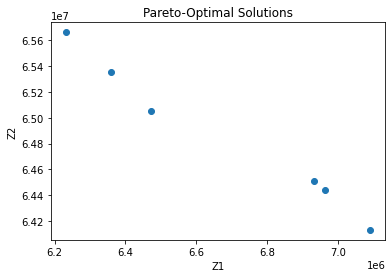

In [88]:
plt.scatter(lst[:,0], lst[:,1])
# set axis lables
plt.xlabel("Z1")
plt.ylabel("Z2")
# set chart title
plt.title("Pareto-Optimal Solutions")
plt.show()

## Multi criteria decision making (TOPSIS)

In [89]:
from topsis import topsis #Technique for Order of Preference by Similarity to Ideal Solution

In [100]:
w = [0.7,0.3]
I = [ 0, 0]
decision = topsis(lst, w, I)
decision.calc()
k = decision.optimum_choice
print('[cost,emission] : ',lst[k])
print('Flow characterstics : ')
print(key_intervals[k])

[cost,emission] :  [ 6231840. 65663680.]
Flow characterstics : 
{Xab_0: 0.0, Xab_1: 0.0, Xab_2: 6460.0, Xab_3: 3660.0, Xb0_c_0: 0.0, Xb0_c_1: 0.0, Xb0_c_2: 0.0, Xb0_c_3: 0.0, Xb0_c_4: 0.0, Xb0_c_5: 0.0, Xb0_c_6: 0.0, Xb0_c_7: 0.0, Xb0_c_8: 0.0, Xb0_c_9: 0.0, Xb0_rev_c_0: 0.0, Xb0_rev_c_1: 0.0, Xb0_rev_c_2: 0.0, Xb0_rev_c_3: 0.0, Xb0_rev_c_4: 0.0, Xb0_rev_c_5: 0.0, Xb0_rev_c_6: 0.0, Xb0_rev_c_7: 0.0, Xb0_rev_c_8: 0.0, Xb0_rev_c_9: 0.0, Xb1_c_0: 0.0, Xb1_c_1: 0.0, Xb1_c_2: 0.0, Xb1_c_3: 0.0, Xb1_c_4: 0.0, Xb1_c_5: 0.0, Xb1_c_6: 0.0, Xb1_c_7: 0.0, Xb1_c_8: 0.0, Xb1_c_9: 0.0, Xb1_rev_c_0: 0.0, Xb1_rev_c_1: 0.0, Xb1_rev_c_2: 0.0, Xb1_rev_c_3: 0.0, Xb1_rev_c_4: 0.0, Xb1_rev_c_5: 0.0, Xb1_rev_c_6: 0.0, Xb1_rev_c_7: 0.0, Xb1_rev_c_8: 0.0, Xb1_rev_c_9: 0.0, Xb2_c_0: 0.0, Xb2_c_1: 0.0, Xb2_c_2: 0.0, Xb2_c_3: 10600.0, Xb2_c_4: 0.0, Xb2_c_5: 0.0, Xb2_c_6: 9700.0, Xb2_c_7: 12000.0, Xb2_c_8: 0.0, Xb2_c_9: 0.0, Xb2_rev_c_0: 0.0, Xb2_rev_c_1: 0.0, Xb2_rev_c_2: 0.0, Xb2_rev_c_3: 10600.0, Xb2_rev_c_4: 0